In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('mail_data.csv')   # loading the data from csv file 
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.tail() # printing last five rows

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [5]:
df.shape # printing the shape of the data

(5572, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
df.isnull().sum() # check for missing value

Category    0
Message     0
dtype: int64

In [9]:
df.duplicated().sum()  # check for duplicate values

415

In [16]:
df = df.drop_duplicates(keep='first') # remove the duplicate values

In [17]:
df.duplicated().sum() # again check for duplicate values

0

In [19]:
df.shape # getting the shape after removal of duplicates

(5157, 2)

In [20]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [21]:
df['Category'] = encoder.fit_transform(df['Category']) # labeling the category column

In [22]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
X = df['Message']
y = df['Category']

In [27]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5157, dtype: object

In [28]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5157, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=3) # split the data

In [31]:
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase='True') # feature extraction

In [33]:
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

In [36]:
model = LogisticRegression()
model.fit(X_train_features, y_train)

LogisticRegression()

In [39]:
y_pred = model.predict(X_test_features)
accuracy1 = accuracy_score(y_test,y_pred)

In [45]:
print('Accuracy on testing data using LogisticRegression' ,accuracy1)

Accuracy on testing data using LogisticRegression 0.9544573643410853


### Using other algorithms

In [42]:
from sklearn.naive_bayes import MultinomialNB

In [43]:
model1 = MultinomialNB()
model1.fit(X_train_features, y_train)

MultinomialNB()

In [44]:
y_pred1 = model1.predict(X_test_features)
accuracy2 = accuracy_score(y_test,y_pred1)
print('Accuracy on testing data using MultinomialNB' ,accuracy2)

Accuracy on testing data 0.9602713178294574


In [59]:
input_sms = ["Please call our customer service representative on 0800 169 6031 between 10am-9pm as you have WON a guaranteed £1000 cash or £5000 prize!"]

input_data_features = feature_extraction.transform(input_sms)

predict = model1.predict(input_data_features)


if (predict[0] == 1):
    print("Spam")
else:
    print("ham")

Spam


In [55]:
import pickle 

pickle.dump(feature_extraction,open('features.pkl','wb'))
pickle.dump(model1,open('model.pkl','wb'))

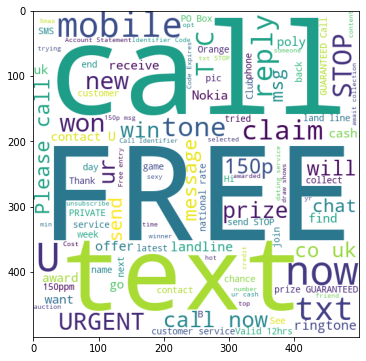

In [62]:
spam_wc = wc.generate(df[df['Category'] == 1]['Message'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)